In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Path to dataset files: /Users/gres1/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


Importing the Kaggle Dataset into a CSV FIle

In [24]:
import pandas as pd

file_path = "/Users/gres1/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1/diabetes.csv"
df = pd.read_csv(file_path)

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


KNN - Predict wether a Person has Diabties or not


In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


In [26]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version from Kaggle
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

# Load the CSV file
dataset = pd.read_csv(f"{path}/diabetes.csv")  # Adjust filename if different

# Replace zeroes in specified columns with the mean of that column
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.nan)
    mean_value = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.nan, mean_value)

print(dataset.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    155.0  33.6   
1            1     85.0           66.0           29.0    155.0  26.6   
2            8    183.0           64.0           29.0    155.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [27]:
# split dataset
X = dataset. iloc[:, 0:8]
y = dataset. iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


Importing Math Libary & Calculating the Square Root

In [29]:
import math 
math.sqrt(len(y_test))

12.409673645990857

In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example data
y_test = np.array([0, 1, 0, 1, 1])
y_pred = np.array([0, 0, 0, 1, 1])

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[2 0]
 [1 2]]


Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



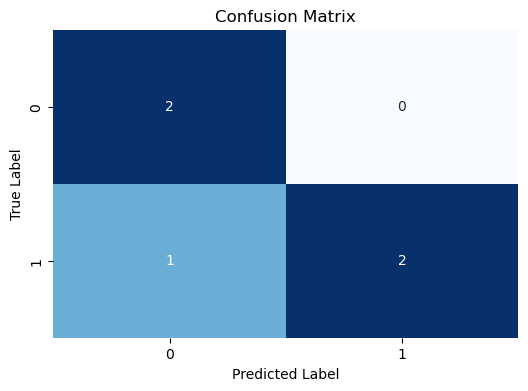

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have y_test and y_pred
# Example:
# y_test = [...]
# y_pred = [...]

# 1. Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
